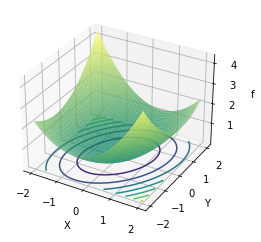

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def f(x,y):
    return x**2/2+y**2/3-x*y/4
x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2                          # range of x
nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)
x,y = np.meshgrid(nx,ny)
z = f(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')
plt.show()

In [15]:
#Monte Carlo Method
xmin,xmax=-1,1
ymin,ymax=-1,1
N=30000
x=np.random.random(N)*(xmax-xmin)+xmin
y=np.random.random(N)*(ymax-ymin)+ymin
min=[]
for i in range(N):
    X=x[0:i+1]
    Y=y[0:i+1]
    z=f(X,Y)
    min.append(np.min(z))

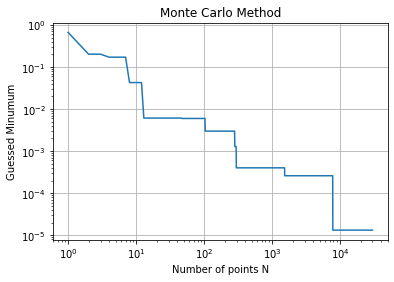

Final Guess= 1.326156801999415e-05


In [20]:
#Monte Carlo Answer
NN=np.linspace(1,N,N)
plt.plot(NN,min)
plt.grid(1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Number of points N')
plt.title('Monte Carlo Method')
plt.ylabel('Guessed Minumum')
plt.show()
print('Final Guessed Minimum=',min[-1])

In [31]:
def grad(f,x,y,dx,dy):
    return (f(x+dx,0)-f(x,0))/dx+(f(0,y+dy)-f(0,y))/dy

In [65]:
#Gradient Step Method
def opto(f,x0,y0,N=10000):
    C=False
    x_p=x0
    y_p=y0
    dx=0.000001
    dy=0.000001
    x=x0-grad(f,x0,y0,dx,dy)*dx
    y=y0-grad(f,x0,y0,dx,dy)*dy
    
    for i in range(N):
        dfx=dfy=grad(f,x,y,dx,dy)-grad(f,x_p,y_p,dx,dy)
        dx=(x-x_p)/dfx
        dy=(y-y_p)/dfy
        x_n=x-grad(f,x,y,dx,dy)*dx
        y_n=y-grad(f,x,y,dx,dy)*dy
        if f(x_n,y_n)<f(x,y):
            x_p=x
            x=x_n
            y_p=y
            y=y_n
        else:
            C=True
            break
    return C,f(x,y),x,y,i
o=opto(f,1,1,100)
if o[0]==True:
    print('Minimum is=',o[1],'with x=',o[2],'and y=',o[3],'after',o[4],'itteration(s)')


Minimum is= 0.052499999999994364 with x= -0.2999999999999839 and y= -0.2999999999999839 after 3 itteration(s)


In [69]:
from scipy.optimize import minimize
def f(x):
    return x[0]**2/2+x[1]**2/3-x[0]*x[1]/4
minimize(f,[1, 1],method='nelder-mead')

 final_simplex: (array([[-7.63570827e-06, -3.57351758e-05],
       [ 3.40582926e-06, -6.27452396e-05],
       [ 4.23886256e-05,  5.78229301e-05]]), array([3.86603772e-10, 1.37154643e-09, 1.40013624e-09]))
           fun: 3.8660377215099155e-10
       message: 'Optimization terminated successfully.'
          nfev: 80
           nit: 42
        status: 0
       success: True
             x: array([-7.63570827e-06, -3.57351758e-05])